<a href="https://colab.research.google.com/github/TranMinhSang20104054/Tr-n-Minh-Sang-20104054/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Colab Notebooks/BTAI/food

/content/gdrive/MyDrive/Colab Notebooks/BTAI/food


In [4]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/BTAI/food/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 300 images belonging to 6 classes.


In [6]:
validation=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/BTAI/food/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 120 images belonging to 6 classes.


In [7]:
training_set.class_indices

{'banh cuon': 0,
 'banh mi': 1,
 'banh pia': 2,
 'banh tet': 3,
 'banh xeo': 4,
 'bun dau': 5}

In [8]:
validation.class_indices

{'banh cuon': 0,
 'banh mi': 1,
 'banh pia': 2,
 'banh tet': 3,
 'banh xeo': 4,
 'bun dau': 5}

In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/50
10/10 [==============================] - 127s 12s/step - loss: 7.1524 - accuracy: 0.1533 - val_loss: 1.7886 - val_accuracy: 0.2167
Epoch 2/50
10/10 [==============================] - 59s 6s/step - loss: 1.7915 - accuracy: 0.2267 - val_loss: 1.7704 - val_accuracy: 0.2167
Epoch 3/50
10/10 [==============================] - 56s 6s/step - loss: 1.7692 - accuracy: 0.2767 - val_loss: 1.6727 - val_accuracy: 0.3417
Epoch 4/50
10/10 [==============================] - 55s 6s/step - loss: 1.6140 - accuracy: 0.3400 - val_loss: 1.4249 - val_accuracy: 0.4333
Epoch 5/50
10/10 [==============================] - 56s 6s/step - loss: 1.4250 - accuracy: 0.4867 - val_loss: 1.3732 - val_accuracy: 0.4667
Epoch 6/50
10/10 [==============================] - 55s 6s/step - loss: 1.4028 - accuracy: 0.4467 - val_loss: 1.1174 - val_accuracy: 0.5667
Epoch 7/50
10/10 [==============================] - 55s 5s/step - loss: 1.1221 - accuracy: 0.5667 - val_loss: 1.0491 - val_accuracy: 0.6500
Epoch 8/50
10/10 [

In [11]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.02845958061516285
Train Accuracy 0.9900000095367432


<function matplotlib.pyplot.show(*args, **kw)>

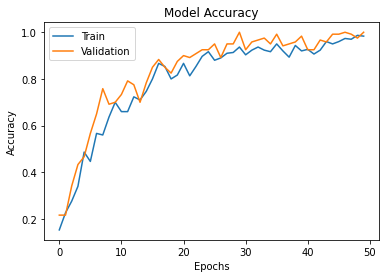

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [13]:
model.save("food.h5")

In [14]:
model_CNN=load_model('food.h5')

1/1 [==============================] - 0s 58ms/step
bun dau


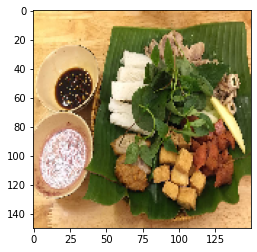

1/1 [==============================] - 0s 57ms/step
banh cuon


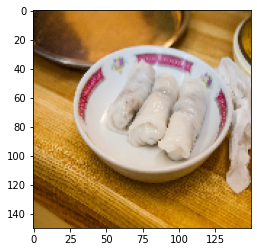

1/1 [==============================] - 0s 57ms/step
banh mi


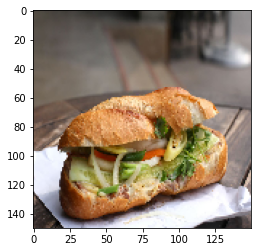

1/1 [==============================] - 0s 67ms/step
banh pia


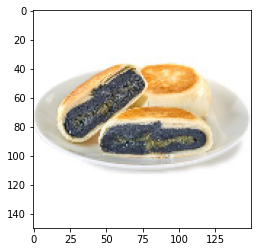

1/1 [==============================] - 0s 58ms/step
banh tet


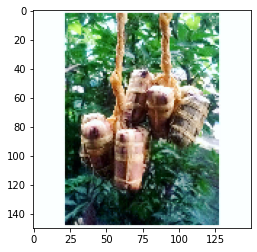

1/1 [==============================] - 0s 77ms/step
banh xeo


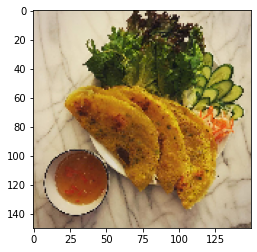

In [17]:
test="/content/gdrive/MyDrive/Colab Notebooks/BTAI/food/Test/"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='banh cuon'
  if round(result[0][1])==1:
    prediction='banh mi'
  if round(result[0][2])==1:
    prediction='banh pia'
  if round(result[0][3])==1:
    prediction='banh tet'
  if round(result[0][4])==1:
    prediction='banh xeo'
  if round(result[0][5])==1:
    prediction='bun dau'
  print(prediction)
  plt.show()

In [20]:
!jupyter nbconvert --to html "/content/food.ipynb"

[NbConvertApp] Converting notebook /content/food.ipynb to html
[NbConvertApp] Writing 1037652 bytes to /content/food.html
